In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The presented dataset is composed of two tsv files named "youtube_videos.tsv" and "transcoding_mesurment.tsv".

<h1>1st dataset's description</h1> 

The first contains 10 columns of fundamental video characteristics for 1.6 million youtube videos; It contains YouTube video id, 
duration, bitrate(total in Kbits), bitrate(video bitrate in Kbits), 
height(in pixle), width(in pixles), framrate, estimated framerate, codec, category, and direct video link. 

This dataset can be used to gain insight in characteristics of consumer videos found on UGC(Youtube).

<h1>2nd dataset's description</h1> 

The second file of our dataset contains 20 columns(see column names for names) which include input and output video characteristics along with their transcoding time and memory resource requirements while transcoding videos to diffrent but valid formats.

The second dataset was collected based on experiments on an Intel 
i7-3720QM CPU through randomly picking two rows from the first dataset and using these as input and output parameters of a video transcoding application, ffmpeg 4 . 

In section 6 we will use the second dataset to build a transcoding time prediction model and show the significance of our datasets.

<h1> Partie 0 : Import & documentation du dataset </h1>


Importons les données :

In [2]:
df2=pd.read_csv('/Users/lucasmonteils/Documents/ESILV/online_video_dataset/transcoding_mesurment.tsv', sep='\t', header=0)
df1=pd.read_csv('/Users/lucasmonteils/Documents/ESILV/online_video_dataset/youtube_videos.tsv', sep='\t', header=0)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168286 entries, 0 to 168285
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                168286 non-null  object 
 1   duration          168286 non-null  int64  
 2   bitrate           168286 non-null  int64  
 3   bitrate(video)    168286 non-null  int64  
 4   height            168286 non-null  int64  
 5   width             168286 non-null  int64  
 6   frame rate        168286 non-null  float64
 7   frame rate(est.)  168286 non-null  float64
 8   codec             168286 non-null  object 
 9   category          168286 non-null  object 
 10  url               168286 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 14.1+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  int64  
 17  o_framerate  68784 non-null  float64
 18  o_width      68784 non-null  int64  
 19  o_he

id = Youtube videp id 

duration = duration of video 

bitrate bitrate(video) = video bitrate 

height = height of video in pixles 

width = width of video in pixles 

frame rate = actual video frame rate 

frame rate(est.) = estimated video frame rate 

codec = coding standard used for the video 

category = YouTube video category 

url = direct link to video (has expiration date) 

i = number of i frames in the video 

p = number of p frames in the video 

b = number of b frames in the video 

frames = number of frames in video 

i_size = total size in byte of i videos 

p_size = total size in byte of p videos 

b_size = total size in byte of b videos 

size = total size of video 

o_codec = output codec used for transcoding 

o_bitrate = output bitrate used for transcoding 

o_framerate = output framerate used for transcoding 

o_width = output width in pixel used for transcoding 

o_height = output height used in pixel for transcoding 

umem = total codec allocated memory for transcoding 


Y:

utime = total transcoding time for transcoding

# Partie I : Exploration


<h4>0) Aperçu</h4>

In [5]:
df1

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
...,...,...,...,...,...,...,...,...,...,...,...
168281,ehHw-P9S4lU,68,816,560,480,360,29.97,29.97,vp8,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168282,ehHw-P9S4lU,68,340,273,320,240,29.97,29.97,flv1,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168283,ehHw-P9S4lU,68,81,55,176,144,12.00,12.00,mpeg4,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...
168284,MzjT-56gXno,285,1290,1181,854,480,29.97,0.00,h264,Sports,http://r4---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [6]:
df2

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444



<h4>1) b_size est tjr nul, on peut l'enlever</h4>


<h4>2) Codec, o_codec sont ils différents ? Observation</h4>

In [7]:
df2[['codec','o_codec']]

,codec,o_codec
0,mpeg4,mpeg4
1,mpeg4,mpeg4
2,mpeg4,mpeg4
3,mpeg4,mpeg4
4,mpeg4,mpeg4
...,...,...
68779,h264,flv
68780,vp8,mpeg4
68781,vp8,flv
68782,h264,mpeg4



<h4>3) Tous les types 'object' de notre dataframe sont des str</h4>

observons le type des objects de nos dataframe:

In [8]:
#df1
print(type(df1.iloc[0]['id']))
print(type(df1.iloc[0]['codec']))
print(type(df1.iloc[0]['category']))
print(type(df1.iloc[0]['url']))

print(type(df2.iloc[0]['id']))
print(type(df2.iloc[0]['codec']))
print(type(df2.iloc[0]['o_codec']))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
df2['o_framerate'].value_counts()

15.00    13772
12.00    13764
29.97    13759
25.00    13751
24.00    13738
Name: o_framerate, dtype: int64

<h4>4) Le premier individu de chaque tableau :</h4>

In [10]:
df1.iloc[0]
#de type Series

id                                                        uDNj-_5ty48
duration                                                          267
bitrate                                                           373
bitrate(video)                                                    274
height                                                            568
width                                                             320
frame rate                                                      29.97
frame rate(est.)                                                  0.0
codec                                                            h264
category                                                        Music
url                 http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
Name: 0, dtype: object

In [11]:
df2.iloc[0]
#de type Series

id             04t6-jw9czg
duration         130.35667
codec                mpeg4
width                  176
height                 144
bitrate              54590
framerate             12.0
i                       27
p                     1537
b                        0
frames                1564
i_size               64483
p_size              825054
b_size                   0
size                889537
o_codec              mpeg4
o_bitrate            56000
o_framerate           12.0
o_width                176
o_height               144
umem                 22508
utime                0.612
Name: 0, dtype: object

<h4>5) Une PCA ne serait pas très utile, car les corrélations sont faibles et peu nombreuses</h4>

when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model.

Nous avons bcq de dimensions, un des critère est donc déjà rempli.

Observons donc si les variables sont hautement correllées. Si c'est le cas, alors une PCA serait intéressant pour améliorer la rapidité et la précision de notre modèle.

/var/folders/b9/p6yt73k12c1d48dqm2_q4t_c0000gn/T/ipykernel_23629/4280202990.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr().round(3)


<AxesSubplot: >

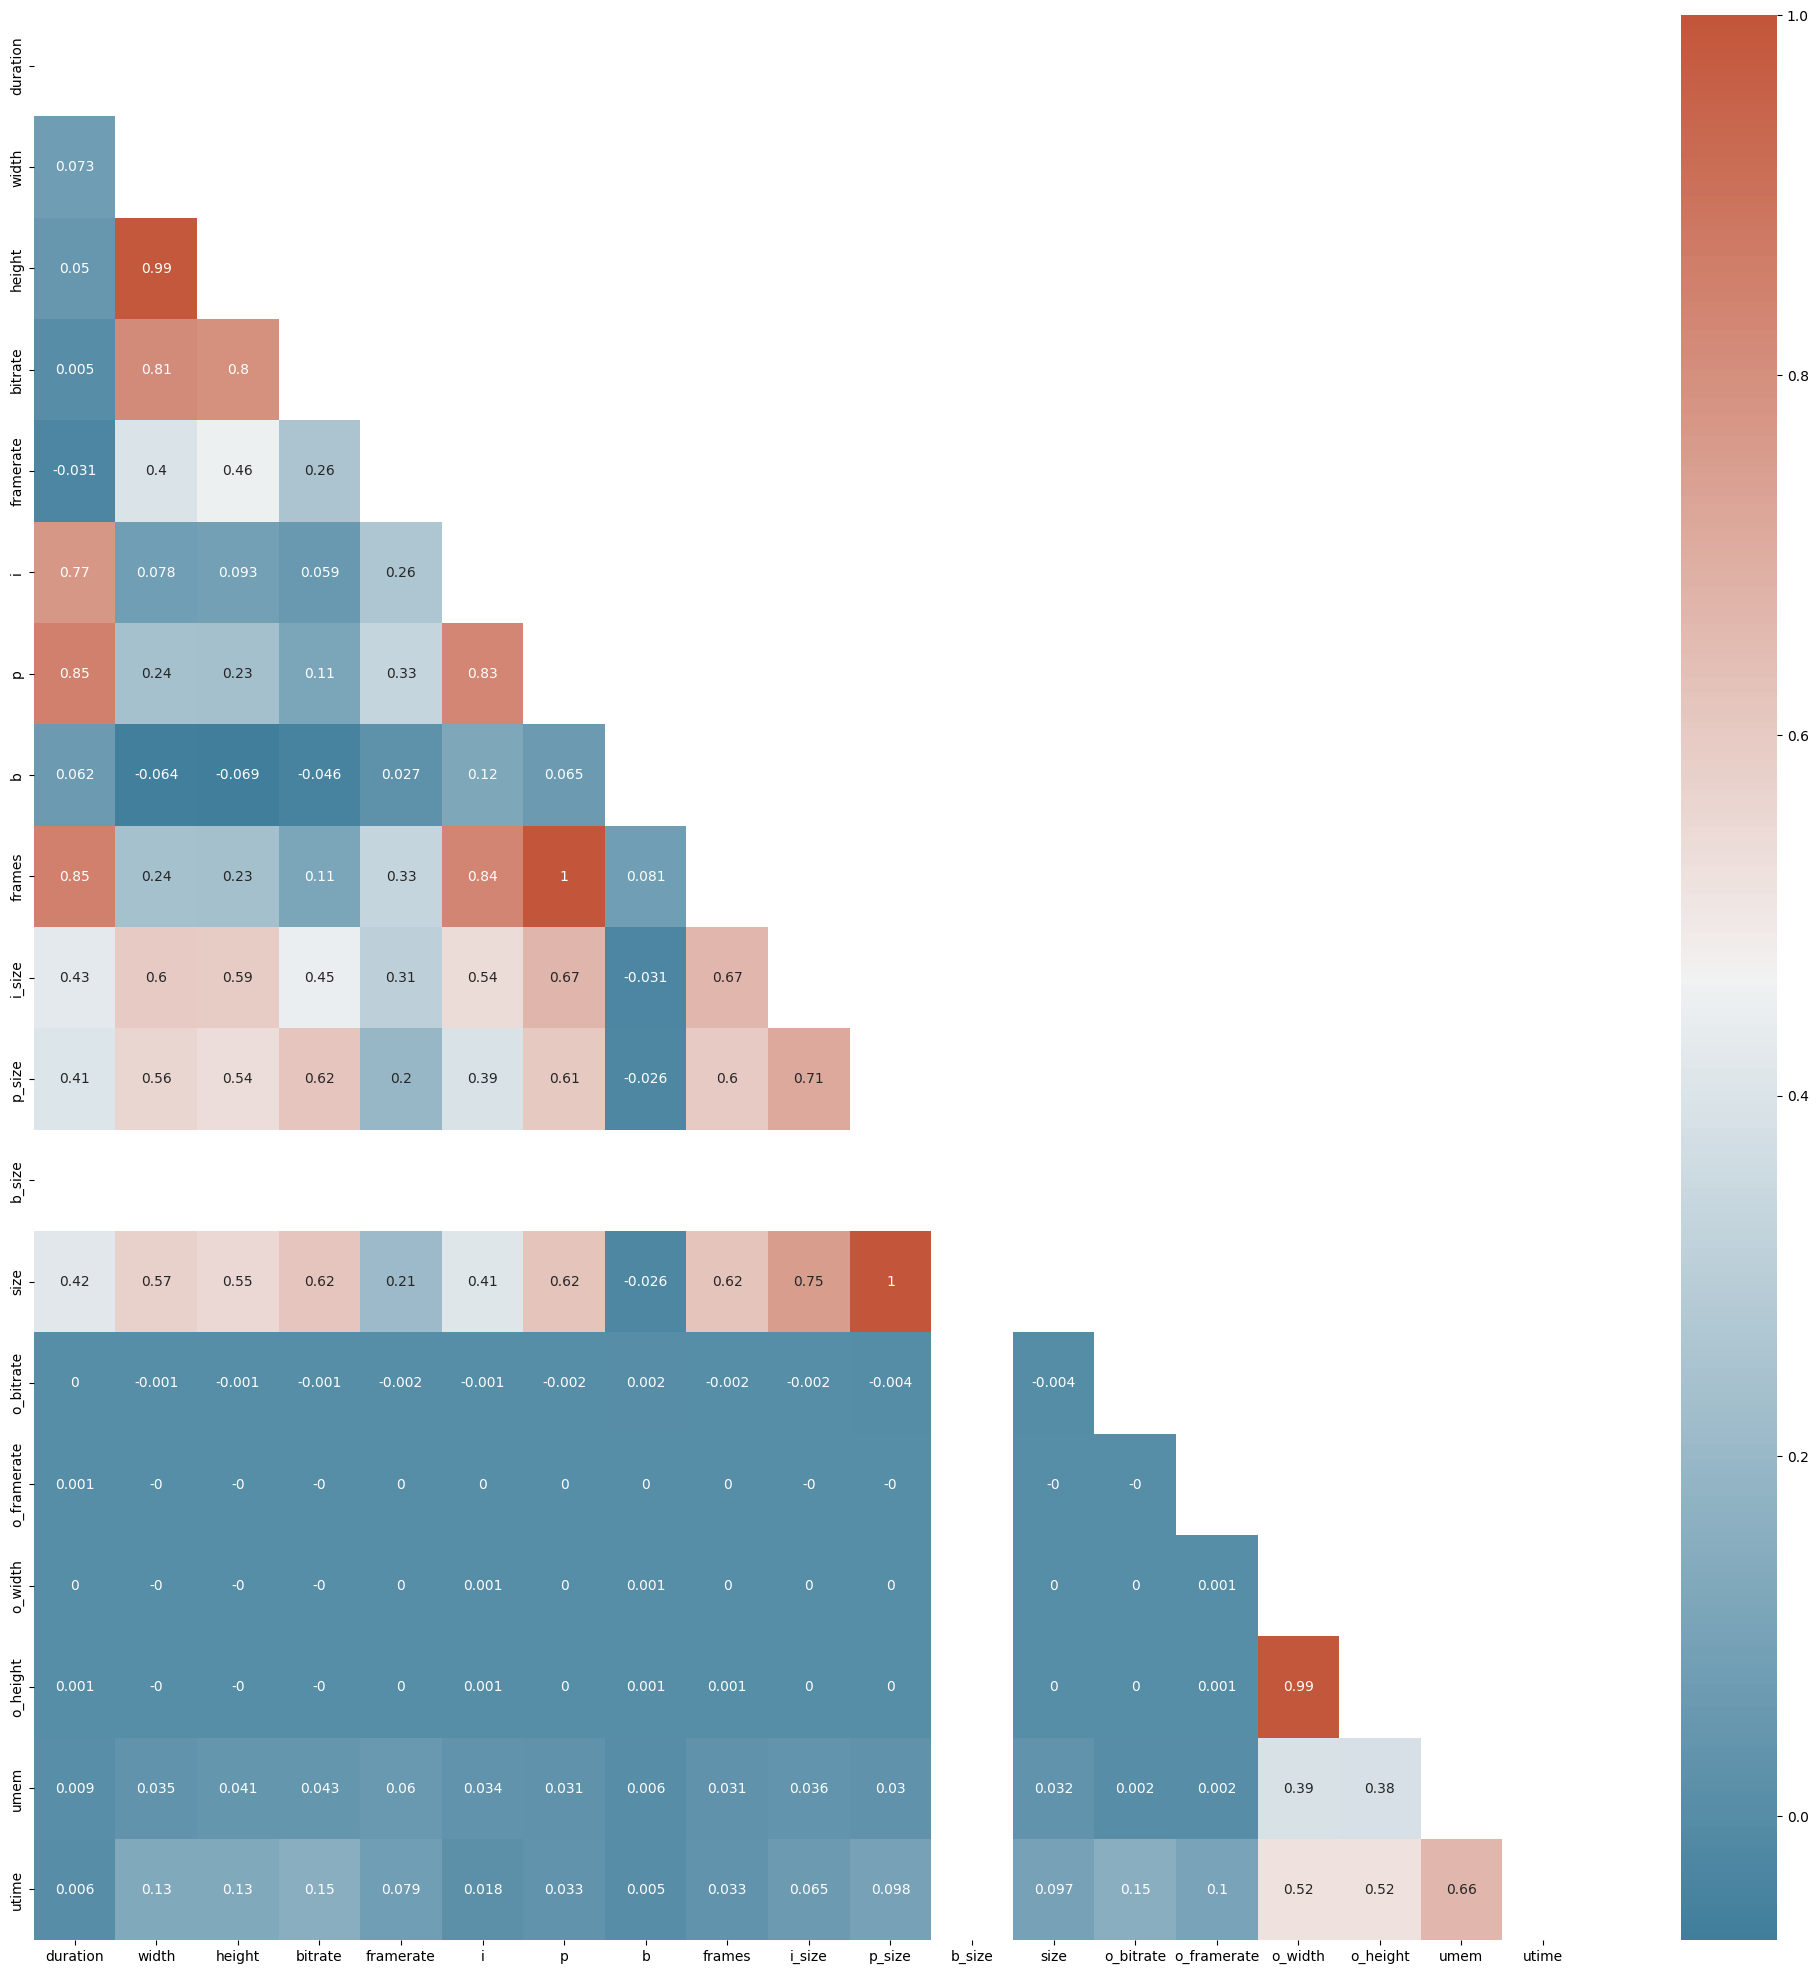

In [12]:
#Nous choisissons uniquement les paramètres numériques, nous enlevons

df2_numerique = df2.drop(labels = ['id','codec','o_codec'], axis=1, inplace=False)
corr = df2.corr().round(3)

f, ax = plt.subplots(figsize=(25, 25))


mask = np.triu(np.ones_like(corr, dtype=bool))


cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<h4>6) On observe les paramètres les plus corrélés au utime</h4>

In [13]:
df2[['width','height','o_bitrate','o_width','o_height','umem']].describe()

,width,height,o_bitrate,o_width,o_height,umem
count,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000
mean,624.934171,412.572226,1.395036e+06,802.336357,503.825541,228224.717900
std,463.169069,240.615472,1.749352e+06,609.959797,315.970438,97430.878373
min,176.000000,144.000000,5.600000e+04,176.000000,144.000000,22508.000000
25%,320.000000,240.000000,1.090000e+05,320.000000,240.000000,216820.000000
50%,480.000000,360.000000,5.390000e+05,480.000000,360.000000,219480.000000
75%,640.000000,480.000000,3.000000e+06,1280.000000,720.000000,219656.000000
max,1920.000000,1080.000000,5.000000e+06,1920.000000,1080.000000,711824.000000


<h4>7) On créer un nouveau paramètre: le rapport i/o de l'hauteur de la vidéo </h4>

In [14]:
Rapport_hauteur_io = df2['height']/df2['o_height']
Rapport_hauteur_io


0        1.000000
1        0.600000
2        0.400000
3        0.300000
4        0.200000
           ...   
68779    0.750000
68780    0.444444
68781    1.666667
68782    3.000000
68783    1.000000
Length: 68784, dtype: float64

In [15]:
Rapport_hauteur_io.describe()

count    68784.000000
mean         1.257744
std          1.214794
min          0.133333
25%          0.444444
50%          1.000000
75%          1.500000
max          7.500000
dtype: float64

<h4>8) On ne peut pas merge les tableaux car id n'est pas unique, et url n'est pas présent sur le df2 </h4>

In [16]:
df1['id'].value_counts()

5OVX-E-X3pM    18
wb-x-F9gf40    18
SwUL-QNh0eQ    14
HDIV-m2CrAQ    14
NB5G-JBQisk    14
               ..
DeiX-odjYO0     1
xf9N-GgmdO8     1
n02s-jXtU-Q     1
Z1LL-tR0NYU     1
b4Y2-EKcAq4     1
Name: id, Length: 25489, dtype: int64

<h4>8) On ne peut pas merge les tableaux car id n'est pas unique, et url n'est pas présent sur le df2 </h4>

In [17]:
df1['id'].value_counts()

5OVX-E-X3pM    18
wb-x-F9gf40    18
SwUL-QNh0eQ    14
HDIV-m2CrAQ    14
NB5G-JBQisk    14
               ..
DeiX-odjYO0     1
xf9N-GgmdO8     1
n02s-jXtU-Q     1
Z1LL-tR0NYU     1
b4Y2-EKcAq4     1
Name: id, Length: 25489, dtype: int64

<h1>Partie II : Nettoyage </h1>

<h4>0) On enlève les NaN : </h4>

In [18]:
print(df1.shape)
print(df2.shape)

(168286, 11)
(68784, 22)


In [19]:
df2 = df2.dropna(axis=0)
df1 = df1.dropna(axis=0)

In [20]:
print(df1.shape)
print(df2.shape)


(168286, 11)
(68784, 22)


Nous voulions supprimer les lignes (axis=0) ayant une ou plusieurs colonnes contenant un NaN.

Comme les deux Dataframe ont exactement la même shape, ils n'avaient aucune données manquantes.


<h4>1) b_size est tjr nul, on peut l'enlever</h4>

In [21]:
df2[['b','b_size']].sum()

b         629226
b_size         0
dtype: int64

In [22]:
df2.drop(labels = ['b_size'], axis=1, inplace=True)
#inplace = True va modifier le DF directement, False va juste le renvoyer
#comme résultat
df2.shape

(68784, 21)

<h1>Partie III : Visualisation </h1>

<AxesSubplot: xlabel='codec', ylabel='Count'>

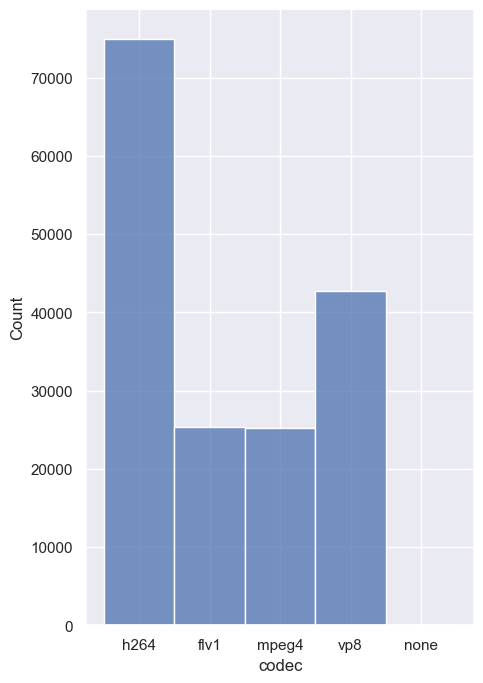

In [23]:
sns.set(rc = {'figure.figsize':(5,8)})
sns.histplot(data=df1['codec'])

<AxesSubplot: >

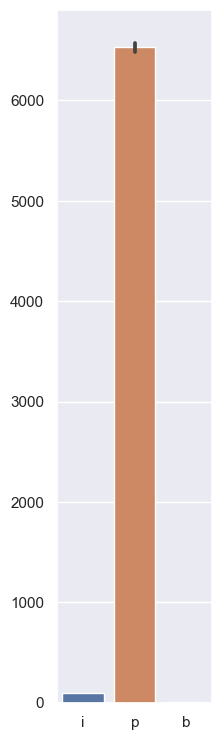

In [24]:
sns.set(rc = {'figure.figsize':(2,9)})
sns.barplot(data= df2[['i','p','b']])

Text(0.5, 1.0, 'Représentation des nationalités les plus fréquentes dans la cinématographie')

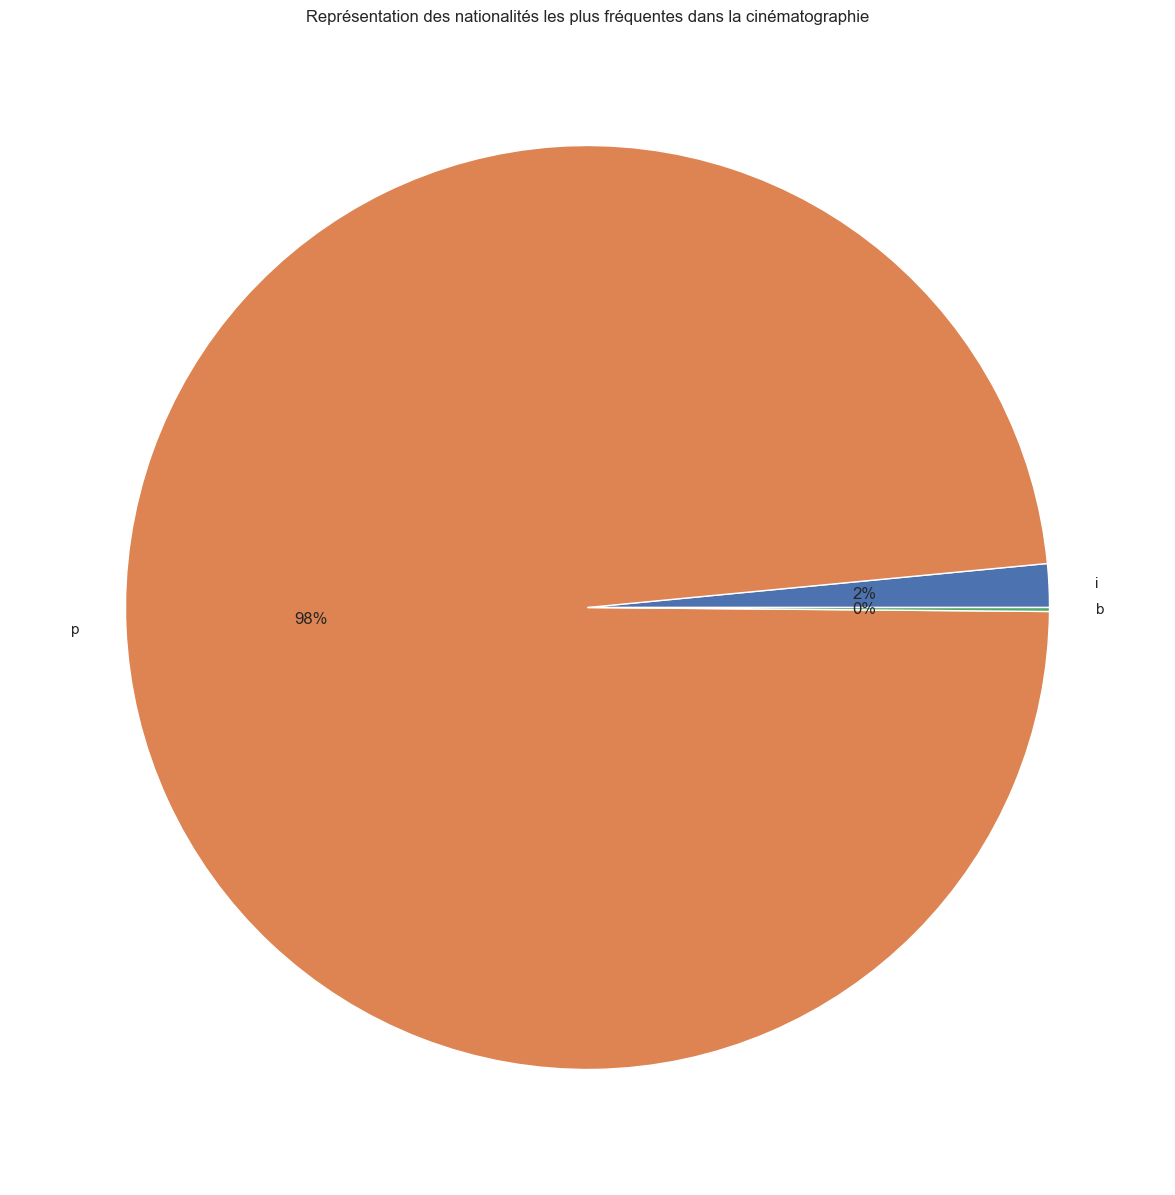

In [25]:
sns.set(rc = {'figure.figsize':(15,15)})
plt.pie(df2[['i','p','b']].sum().tolist(),labels=df2[['i','p','b']].columns.tolist(),autopct=lambda x:'{:1.0f}%'.format(x))
plt.title("Représentation des nationalités les plus fréquentes dans la cinématographie")

In [26]:
df2[['i','p','b']].sum().tolist()

[6938126, 449275917, 629226]

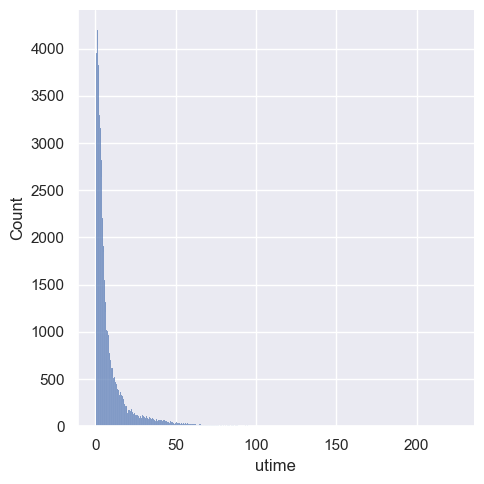

In [27]:
sns.displot(df2["utime"])

Pour mieux voir:

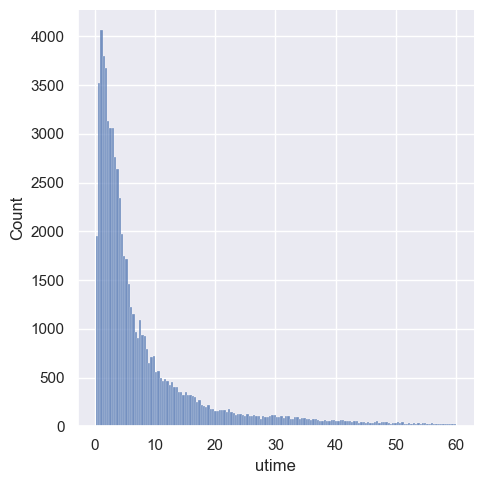

In [28]:
sns.displot(df2[df2['utime']<60]['utime'])

Répartition du temps d'encodage par tranches de 5 mins

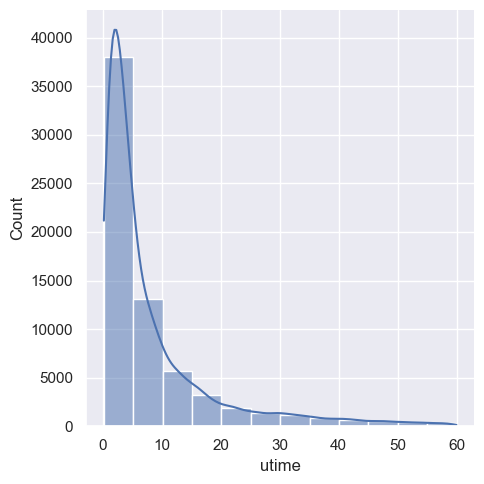

In [29]:
sns.displot(df2[df2['utime']<60]['utime'], kde=True, bins=12)

In [30]:
df2[['width','height','o_height','o_width']]

,width,height,o_height,o_width
0,176,144,144,176
1,176,144,240,320
2,176,144,360,480
3,176,144,480,640
4,176,144,720,1280
...,...,...,...,...
68779,480,360,480,640
68780,640,480,1080,1920
68781,320,240,144,176
68782,1280,720,240,320


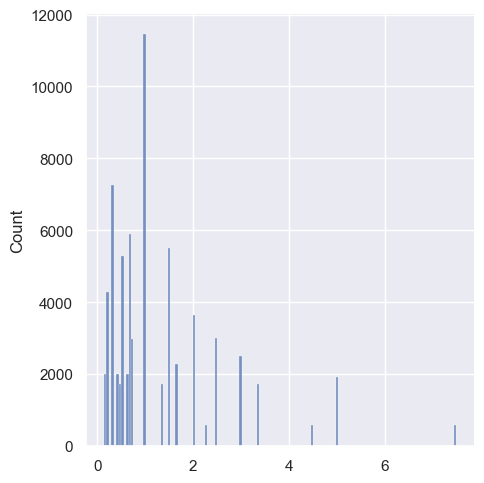

In [31]:
sns.set(rc = {'figure.figsize':(10,1)})
sns.displot(Rapport_hauteur_io)

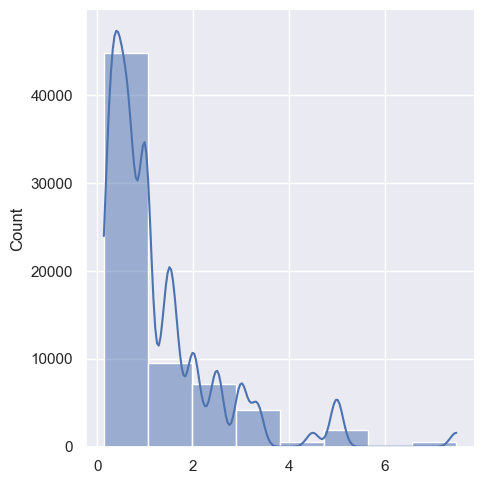

In [32]:
sns.displot(Rapport_hauteur_io, kde=True, bins=8)

<h1>Partie IV : Modèle </h1>

<h3> 0) Séparation test/train </h3>

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df2['utime']
X = df2.drop(['id','codec','o_codec','utime'],axis=1,inplace=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state = 123)

print('Train set est de taille: ',X_train.shape)
print('Test set est de taille: ',X_test.shape)

Train set est de taille:  (13756, 18)
Test set est de taille:  (55028, 18)


<h3> 1) KN Regressor </h3>

In [41]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
print('Train score: ',neigh.score(X_train,y_train))
print('Test score: ',neigh.score(X_test,y_test))


Train score:  0.819415162730038
Test score:  0.5784490223166803


<h3> 2) Cross validation & Validation curve pour KN regressor </h3>

In [8]:
from sklearn.model_selection import validation_curve

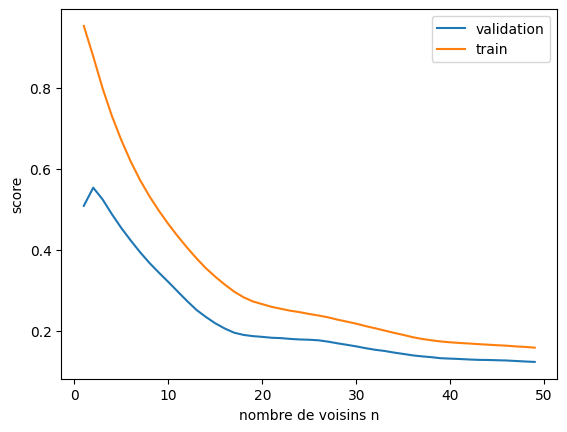

In [52]:
model = KNeighborsRegressor()
k = np.arange(1,50)
train_score, val_score = validation_curve(estimator= model,X=X_train,y=y_train,param_name='n_neighbors',param_range=k)
#,'n_neighbors',k, cv=5

plt.plot(k,val_score.mean(axis = 1), label='validation')
plt.plot(k, train_score.mean(axis=1),label='train')

plt.ylabel('score')
plt.xlabel('nombre de voisins n')
plt.legend()

Nous remarquons que certain des train scores sont bon mais les test scores sont très mauvais. Nous avons de l'overfitting.

<h3> 4) Random Forest Regressor </h3>

In [9]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
print('Train score: ',regr.score(X_train,y_train))
print('Test score: ',regr.score(X_test,y_test))

Train score:  0.6364340987992806
Test score:  0.6325041284683659


<h3> 5)  Cross validation & Validation curve pour KN regressor  </h3>

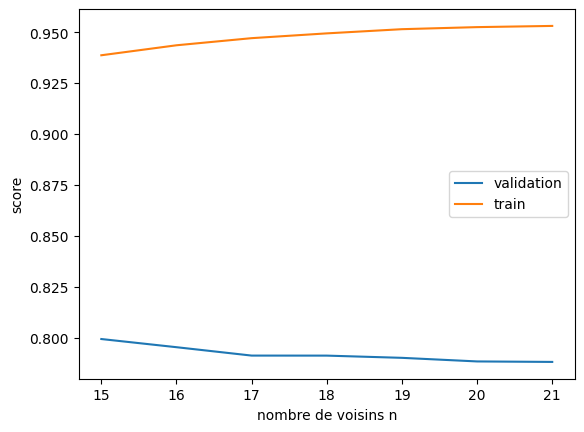

In [11]:
model = RandomForestRegressor()
k = np.arange(15,22)
train_score, val_score = validation_curve(estimator= model,X=X_train,y=y_train,param_name='max_depth',param_range=k)


plt.plot(k,val_score.mean(axis = 1), label='validation')
plt.plot(k, train_score.mean(axis=1),label='train')

plt.ylabel('score')
plt.xlabel('nombre de voisins n')
plt.legend()

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_depth': np.arange(15,30),'random_state': np.arange(0,3)}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'random_state': array([0, 1, 2])})

In [24]:
grid.best_score_

0.7989467655287086

In [25]:
grid.best_params_

{'max_depth': 15, 'random_state': 1}

In [35]:
#from sklearn import svm 



#regr = svm.SVR()
#regr.fit(X, y)
#regr.score(X,y)